## Observations and Insights 

Observations
For the drug Capomulin and for which the mouse s185 is being treated with, There is a strong negative correlation between time and tumor volume, which we can summarise as the drug is effective in decreasing the size of the tumor over time. It is particularly and most effective in the first ten days, as it decreases 7.5(mm3) compared to the next 20 days it only decreases 5(mm3) in double the amount of time. 

Of all the drugs Ramicane seems to be the most effective with the lowest average tumor volume for data points collected, as shown in the box plot and taking into account it had the most of mice per treatment as shown in the bar graph "Total Number of Mice Per Treatment". 

Also for the drug Capomulin we can summarise that as the weight of the mouse increases so does the size of the tumor volume, as shown in scatter plot figure "Weight vs Average Tumor Volume"


In [1]:
#%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Matplotlib_homework/Mouse_metadata.csv"

study_results_path = "Matplotlib_homework/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
total_mice = merged_df["Mouse ID"].nunique()
total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_df[merged_df.duplicated(["Mouse ID","Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_df.describe()


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicate = merged_df[merged_df["Mouse ID"]!= "g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.
mice_clean = drop_duplicate["Mouse ID"].nunique()

## Summary Statistics

In [8]:
drop_duplicate.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
#rename tumor volume 
drop_duplicate = drop_duplicate.rename(columns={"Tumor Volume (mm3)":"Tumor Volume","Weight (g)":"Weight"})


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#tumor_vol = drop_duplicate["Tumor Volume"]
drop_duplicate.head()
# This method is the most straighforward, creating multiple series and putting them all together at the end.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_regimen = drop_duplicate[["Tumor Volume","Drug Regimen"]]
groupby_mice = drop_duplicate.groupby(["Drug Regimen"])
mean = groupby_mice["Tumor Volume"].mean()
median = groupby_mice["Tumor Volume"].median()
variance = groupby_mice["Tumor Volume"].var()
std_dev = groupby_mice["Tumor Volume"].std()
SEM = groupby_mice["Tumor Volume"].sem()

# This method produces everything in a single groupby function
summary_statistics = pd.DataFrame({"Mean":mean,"Median":median,"Variance":variance,"Standard Deviation":std_dev,"SEM":SEM})
summary_statistics.round(2)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

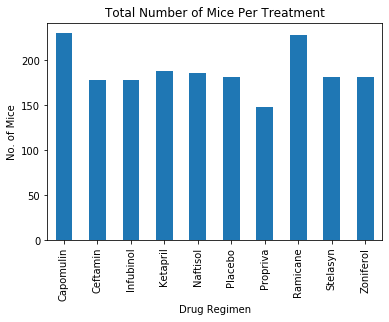

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
new_groupby_mice = drop_duplicate.groupby(["Drug Regimen"])
count_mice = new_groupby_mice["Mouse ID"].count()


#bar_df = pd.DataFrame({"Number of Mice":values},index=index)
bar_graph = count_mice.plot(kind="bar",title="Total Number of Mice Per Treatment")

bar_graph.set_xlabel("Drug Regimen")                       
bar_graph.set_ylabel("No. of Mice")                      
plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Mice')

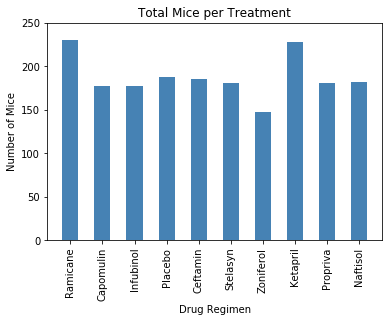

In [46]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot
drug = drop_duplicate["Drug Regimen"].unique()
mice_count_py = new_groupby_mice["Mouse ID"].count()

#set x axis
x_axis = np.arange(len(drug))

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]

#plot the bar chart 
plt.bar(drug,mice_count_py, color='steelblue',align="center",width=0.5)

plt.xticks(tick_locations,drug,rotation="vertical")
#set the ylimit of the chart 
plt.ylim(0,250)

#set title & x-axis & y-axis
plt.title("Total Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

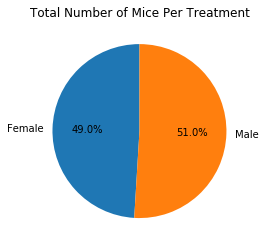

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
m_f_mice = drop_duplicate.groupby(["Sex"])
count_m_f_mice = m_f_mice["Mouse ID"].count()

#create pie chart 
pie_pandas = count_m_f_mice.plot(kind="pie",startangle=90,autopct='%1.1f%%',title="Total Number of Mice Per Treatment")

pie_pandas.set_ylabel("")

plt.show()
plt.tight_layout()
#plt.savefig("Images/Total_Number_of_Mice_Per_Treatment.png")

Text(0.5, 1.0, 'Total Number of Mice Per Treatment')

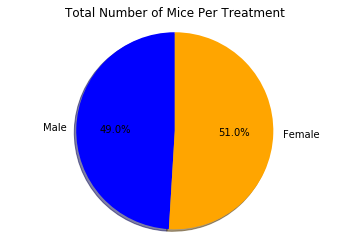

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
py_gender = drop_duplicate["Sex"].unique()
gender_count_py = m_f_mice["Mouse ID"].count()


# The colors of each section of the pie chart
colors = ["blue", "orange"]


plt.pie(gender_count_py, labels=py_gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90);

plt.axis("equal");
plt.title("Total Number of Mice Per Treatment")


## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = drop_duplicate.sort_values("Timepoint",ascending=False)

#drop duplicate to remove duplicate time points for each mouse
dropped_mouse = max_timepoint.drop_duplicates(subset="Mouse ID", keep="first")

In [53]:
# overwrite each dataframe to remove each drug treatment we dont want to use
df_keta = dropped_mouse.loc[dropped_mouse["Drug Regimen"]!= "Ketapril"]
df_naft = df_keta.loc[df_keta["Drug Regimen"]!= "Naftisol"]
df_stel = df_naft.loc[df_naft["Drug Regimen"]!= "Stelasyn"]
df_zoni = df_stel.loc[df_stel["Drug Regimen"]!= "Zoniferol"]
df_prop = df_zoni.loc[df_zoni["Drug Regimen"]!= "Propriva"]
final_df = df_prop.loc[df_prop["Drug Regimen"]!= "Placebo"]

final_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight,Timepoint,Tumor Volume,Metastatic Sites
360,g316,Capomulin,Female,22,22,45,40.159220,2
124,y793,Capomulin,Male,17,17,45,31.896238,2
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
350,v923,Capomulin,Female,19,21,45,40.658124,2
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=["Capomulin","Ramicane","Infubinol","Ceftamin"]                                                                                                                                                               

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

for drug in treatment_list:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
    row_tumor = final_df.loc[final_df["Drug Regimen"] == drug,"Tumor Volume"]
    
    # then append values to the list create above
    tumor_vol_data.append(row_tumor)
    
        
    #calculate IQR
    
    quartiles = round(row_tumor.quantile([0.25,0.5,0.75]))
    lowerq = round(quartiles[0.25])
    upperq = round(quartiles[0.75])
    iqr = round(upperq-lowerq)
    
    #Determine outliers using upper and lower bounds
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #print the findings 
    print("----------------------------------------------")
    print(f"The lower quartile of {drug} tumor volume is: {lowerq}")
    print(f"The upper quartile of {drug} tumor volume is: {upperq}")
    print(f"The interquartile range of {drug} tumor volume is: {iqr}")
    print(f"The the median of {drug} tumor volume is: {quartiles[0.5]} ")


    print(f"Values below {lower_bound} could be outliers for {drug} tumor volume.")
    print(f"Values above {upper_bound} could be outliers for {drug} tumor volume.")
    print("----------------------------------------------")
    print("\n")
    
    

----------------------------------------------
The lower quartile of Capomulin tumor volume is: 32.0
The upper quartile of Capomulin tumor volume is: 40.0
The interquartile range of Capomulin tumor volume is: 8.0
The the median of Capomulin tumor volume is: 38.0 
Values below 20.0 could be outliers for Capomulin tumor volume.
Values above 52.0 could be outliers for Capomulin tumor volume.
----------------------------------------------


----------------------------------------------
The lower quartile of Ramicane tumor volume is: 32.0
The upper quartile of Ramicane tumor volume is: 41.0
The interquartile range of Ramicane tumor volume is: 9.0
The the median of Ramicane tumor volume is: 37.0 
Values below 18.5 could be outliers for Ramicane tumor volume.
Values above 54.5 could be outliers for Ramicane tumor volume.
----------------------------------------------


----------------------------------------------
The lower quartile of Infubinol tumor volume is: 54.0
The upper quartile of I

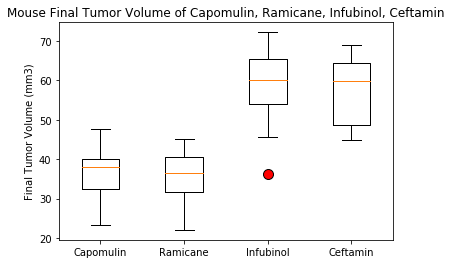

In [57]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Set properties for any outliers
outliers = dict(markerfacecolor = "red", markersize = 10)

# Plot box plot with infomration from the tumor volume list, including drug names as labels for each plot, and assign the outlier properties
plt.boxplot(tumor_vol_data, flierprops=outliers, labels = treatment_list)

# Give the plot a title and y label
plt.title("Mouse Final Tumor Volume of Capomulin, Ramicane, Infubinol, Ceftamin")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume(mm3) vs Time for Mouse ID s185 treated with Capomulin')

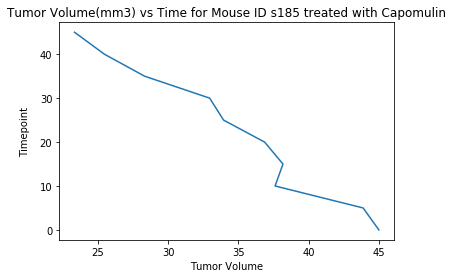

In [58]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#make new dataframe for only Capomulin 
new_df_capo = drop_duplicate.loc[drop_duplicate["Drug Regimen"]=="Capomulin", :]
#select which mouse you want to plot a graph for out of the dataset
new_df_capo_df = new_df_capo.loc[new_df_capo["Mouse ID"]=="s185", :]
#plot the line graph 
new_df_capo_df.set_index('Tumor Volume')['Timepoint'].plot();
#label the y axis
plt.ylabel("Timepoint", labelpad=10)
#label the graph 
plt.title("Tumor Volume(mm3) vs Time for Mouse ID s185 treated with Capomulin")

Text(0, 0.5, 'Weight')

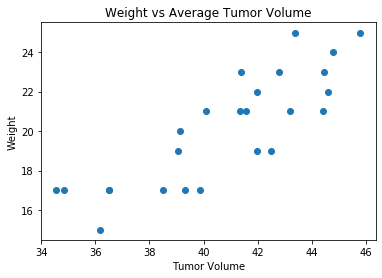

In [59]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
data = drop_duplicate.loc[drop_duplicate["Drug Regimen"]=="Capomulin", :]

tumor_avg = data.groupby(["Mouse ID"]).mean()["Tumor Volume"]
weight_avg = data.groupby(["Mouse ID"]).mean()["Weight"]

#plot use subplot
fig,scatterplt = plt.subplots()
scatterplt.scatter(tumor_avg,weight_avg)

#set title, x label and y label
scatterplt.set_title("Weight vs Average Tumor Volume")
scatterplt.set_xlabel("Average Tumor Volume")
scatterplt.set_ylabel("Average Weight")


## Correlation and Regression

Text(0, 0.5, 'Average Weight')

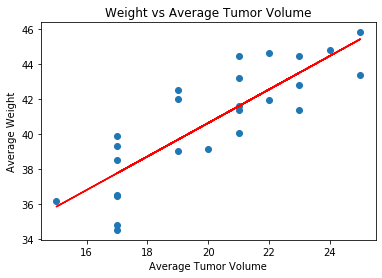

In [65]:
# Calculate the correlation coefficient and linear regression model 
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
data = drop_duplicate.loc[drop_duplicate["Drug Regimen"]=="Capomulin", :]

#calc avg weight and tumor volume using data frame and variables from above scatter plot 
tumor = data.groupby(["Mouse ID"]).mean()["Tumor Volume"]
weight = data.groupby(["Mouse ID"]).mean()["Weight"]

#calc the lin regression - refer daniels
(slope, intercept,r_value,p_value,std_err) = st.linregress(weight,tumor)
regress_values = weight * slope+ intercept

#plot scatter
fig,scatterplt = plt.subplots()
scatterplt.scatter(weight,tumor)

#plot a line ontop of scatter plot
plt.plot(weight,regress_values,"red")
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#set title, x and y lable
plt.title("Weight vs Average Tumor Volume")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Average Weight")